### (1) 데이터 가져오기

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [58]:
train['datetime']=pd.to_datetime(train['datetime'])

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [60]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [61]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

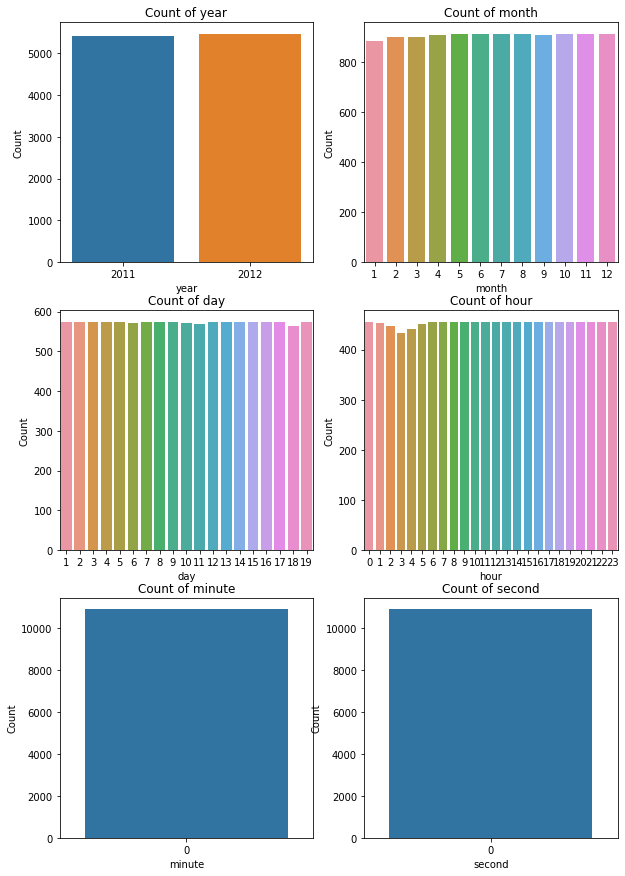

In [62]:
col = ['year', 'month', 'day', 'hour', 'minute', 'second']

fig, axes = plt.subplots(3, 2, figsize=(10, 15))

for i, c in enumerate(col):
    sns.countplot(x=train[c], ax=axes.flat[i]) 
    axes.flat[i].set_title(f'Count of {c}')
    axes.flat[i].set_ylabel('Count')

 ### X, y 컬럼 선택 및 train/test 데이터 분리

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

In [64]:
train['dayofweek'] = train['datetime'].dt.day_of_week # 요일

### 요일 변수를 전처리에 있어 더 직관적이게 변경 (연속적이라고 보기 힘들다. 월요일-화요일??)
train['dayofweek'] = train['dayofweek'].replace({0: 'Mon', 1: 'Tue', 2: 'Wed',
                                                  3: 'Thu', 4: 'Fri', 5: 'Sat',
                                                  6: 'Sun'})

In [65]:
# 겨울 변수가 잘못 들어가 있다. 
train['season'] = train['month'].apply(lambda x: 1 if x in [3,4,5] else
                                        2 if x in [6,7,8] else
                                        3 if x in [9,10,11] else
                                          4)

In [66]:
## 계절 역시 연속적인 형태는 아니다. 크기 개념 X

train['season'] = train['season'].replace({1 : 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

In [67]:
train['workingday'] = train['workingday'].astype(str)

In [68]:
train['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [69]:
train = train[train['weather'] != 4]
train['weather'] = train['weather'].replace({1: 'Clear', 2: 'Mist', 3: 'Light Rain &  Light Snow'})

In [70]:
# 달 역시 마찬가지
train['month'] = train['month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April',
                                          5: 'May', 6: 'June', 7: 'July', 8: 'August',
                                          9: 'September', 10: 'October', 11: 'November', 12: 'December'})

In [71]:
## 19일에서 끊겼기 때문에...
## 더군다나 test가 20일부터 시작하는 큰 수이기도 하고 또, 일자 자체에 의미가 있지 않다.

In [72]:
train = train.drop(columns=['datetime','casual','registered','minute','second','day','temp','holiday'])

In [73]:
### 측정을 하지 못해 0 값이라는 뜻은 기계적 결함 등 따위의 이유가 아니라, 시간 당 풍속이 굉장히 미미해서 0값인 경우가 많을 것이다.
### 국한된 지식일수도 있겠으나 워싱턴DC의 도심 속 풍속 수준은 크지 않을 것.
### 30 넘어가면 강풍

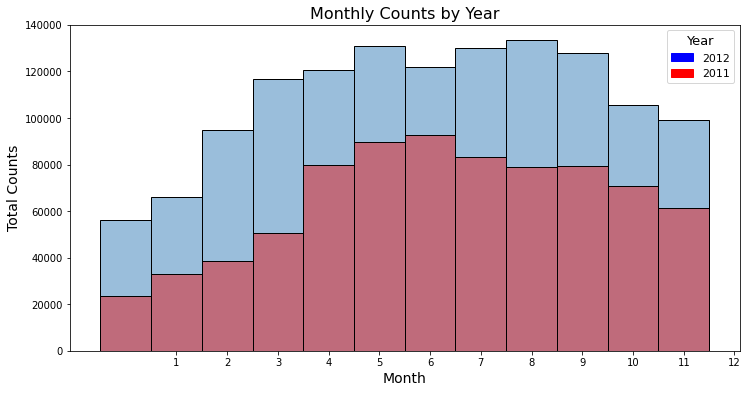

In [74]:
import matplotlib.patches as mpatches
plt.figure(figsize=(12, 6))
sns.histplot(data=train, x='month', weights=train['count'], hue='year', multiple='layer', palette='Set1', bins=12, discrete=True)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Counts', fontsize=14)
plt.title('Monthly Counts by Year', fontsize=16)
plt.xticks(ticks=range(1, 13), labels=[1,2,3,4,5,6,7,8,9,10,11,12])

red_patch = mpatches.Patch(color='red', label='2011')
blue_patch = mpatches.Patch(color='blue', label='2012')
plt.legend(handles=[blue_patch, red_patch], title='Year', title_fontsize='13', fontsize='11')

plt.show()

## 년도별 데이터의 차이가 이렇게 크면 예측을 하는데 year 변수가 과도한 긍정 요인으로 작용할 수 있다.
### 원인 !?
### 확인해보니까 Capital Bikeshare 회사가 2010년 10월 경에 설립된 회사!
### 첫 년도에는 회사의 여건 상 인프라 구축 및 시행착오가 있었을 수 있다.
### 당장의 2011년,2012년 데이터를 테스트하는데엔 효과적일 수 있으나 장기적인 데이터를 가지고 예측하는 관점에서는 year 변수를 사용하기엔 변수가 너무 많다.

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10885 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10885 non-null  object 
 1   workingday  10885 non-null  object 
 2   weather     10885 non-null  object 
 3   atemp       10885 non-null  float64
 4   humidity    10885 non-null  int64  
 5   windspeed   10885 non-null  float64
 6   count       10885 non-null  int64  
 7   year        10885 non-null  int64  
 8   month       10885 non-null  object 
 9   hour        10885 non-null  int64  
 10  dayofweek   10885 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 1020.5+ KB


In [76]:
# 다만, 시간(hour)은 연속적인 형태일 수 있다. 출근시간,퇴근시간에 자전거 대여가 급증하는 것으로 보아 6,7,8, 16,17,18 등이 그러하다... 
list = ['season','workingday','weather','month','dayofweek','hour']
print(list)
train = pd.get_dummies(train,columns=list)
print(train.shape)

['season', 'workingday', 'weather', 'month', 'dayofweek', 'hour']
(10885, 57)


### (4) X, y 컬럼 선택 및 train/test 데이터 분리

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop(columns=['count']), train['count'], test_size=0.2, random_state=42)

print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (8708, 56)
y_train.shape: (8708,)
X_test.shape: (2177, 56)
y_test.shape: (2177,)


### (5) LinearRegression 모델 학습

In [78]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [82]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

102.82613920081019

### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

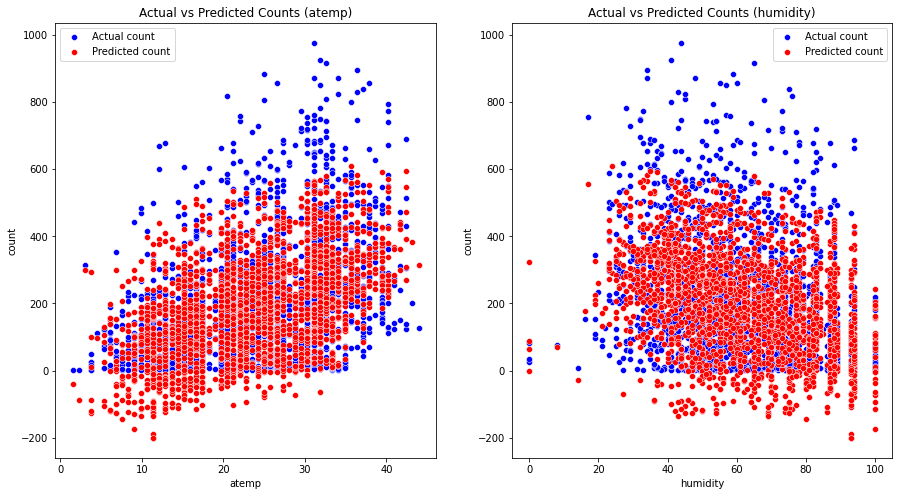

In [86]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test['atemp'], y=y_test, label="Actual count", color="blue")
sns.scatterplot(x=X_test['atemp'], y=y_pred, label="Predicted count", color="red")
plt.xlabel("atemp")
plt.ylabel("count")
plt.title("Actual vs Predicted Counts (atemp)")

# 2. x축을 humidity로 하여 예측 결과 시각화
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test['humidity'], y=y_test, label="Actual count", color="blue")
sns.scatterplot(x=X_test['humidity'], y=y_pred, label="Predicted count", color="red")
plt.xlabel("humidity")
plt.ylabel("count")
plt.title("Actual vs Predicted Counts (humidity)")

plt.show()